In [28]:
import pickle
import pandas as pd
from math import pi 
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import numpy as np


In [29]:
with open('max_metrics.pickle', 'rb') as picklefile:
    max_speed, max_boost_eff, max_agg, max_team_cohesion, max_game_inv = pickle.load(picklefile)

In [30]:
max_speed

46.27437424882789

In [31]:
df = pd.read_csv('../../1-data-collection/data/boay00.csv')

In [32]:
df = df

In [33]:
def make_spider( df, row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,1,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5,6,7,8,9], ['1',"2",'3',"4",'5',"6",'7', "8",'9'], color="grey", size=7)
    plt.ylim(5,10)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [34]:
def make_plots(df, player_name):
    means = df.mean(axis= 0)
    df.index = range(len(df.index))
    df = df.drop(columns = ['player_name'])
    df = df.append(means, ignore_index = True)
    df = df.loc[[len(df) - 1], :]
    df = df.rename(index={len(df): player_name})

    try:
        df.drop(columns = 'goals_against_while_last_defender')
    except KeyError:
        pass

    to_drop = [
        'shots_against',
        'goals_against',
        'shooting_percentage',
        'bpm',
        'amount_stolen_big',
        'amount_stolen_small',
        'count_collected_big',
        'count_collected_small',
        'count_stolen_small',
        'count_stolen_big',
        'amount_overfill_stolen',
        'time_zero_boost',
        'time_full_boost',
        'time_boost_0_25',
        'time_boost_25_50',
        'time_boost_50_75',
        'time_boost_75_100',
        'avg_speed',
        'total_distance',
        'time_supersonic_speed',
        'time_boost_speed',
        'time_slow_speed',
        'time_ground',
        'time_low_air',
        'time_high_air',
        'time_powerslide',
        'time_defensive_third',
        'time_neutral_third',
        'time_offensive_third',
        'time_defensive_half',
        'time_offensive_half',
        'time_behind_ball',
        'time_infront_ball',
        'time_most_back',
        'time_most_forward',
        'time_closest_to_ball',
        'time_farthest_from_ball'
    ]
    df.drop(columns = to_drop, inplace = True)

    speed = ['count_powerslide', 
             'percent_supersonic_speed', 
             'avg_speed_percentage', 
             'percent_slow_speed',
             'percent_high_air',
             'percent_low_air',
             'percent_ground',
             'bcpm'
            ]

    boost_efficiency = ['bcpm',
                        'avg_amount',
                        'amount_collected',
                        'amount_collected_big',
                        'amount_collected_small',
                        'amount_overfill',
                        'amount_used_while_supersonic',
                        'percent_zero_boost',
                        'percent_full_boost',
                        'percent_boost_0_25',
                        'percent_boost_25_50',
                        'percent_boost_50_75',
                        'percent_boost_75_100',
                        'avg_powerslide_duration',
                        'avg_speed_percentage',
                        'percent_boost_speed',
                        'percent_ground',
                        'percent_low_air',
                        'percent_high_air'
    ]

    aggression = ['amount_stolen',
                  'amount_used_while_supersonic',
                  'avg_distance_to_mates',
                  'inflicted',
                  'percent_defensive_third',
                  'percent_offensive_third',
                  'percent_infront_ball',
                  'percent_most_back',
                  'percent_most_forward'
    ]

    team_cohesion = ['goals',
                     'assists',
                     'amount_collected_big',
                     'amount_collected_small',
                     'avg_distance_to_ball_possession',
                     'avg_distance_to_ball_no_possession',
                     'avg_distance_to_mates'
    ]

    game_involvement = ['score',
                        'amount_collected',
                        'amount_stolen',
                        'percent_low_air',
                        'percent_ground',
                        'avg_distance_to_ball_possession',
                        'avg_distance_to_ball_no_possession',
                        'percent_closest_to_ball',
                        'percent_farthest_from_ball',
                        'inflicted'
    ]

    speed_df = df.loc[:, speed]
    boost_efficiency_df = df.loc[:, boost_efficiency]
    aggression_df = df.loc[:, aggression]
    team_cohesion_df = df.loc[:, team_cohesion]
    game_involvement_df = df.loc[:, game_involvement]



    speed_df['speed'] = (speed_df.count_powerslide / 10
                        ) + (speed_df.avg_speed_percentage / 10
                        ) + (speed_df.percent_high_air
                        ) + ((speed_df.percent_low_air / speed_df.percent_ground) * 9
                        ) + (speed_df.bcpm / 66) + ((speed_df.percent_supersonic_speed/speed_df.percent_slow_speed
                        ) * 15)

    speed_df['speed'] = speed_df['speed'] / 53.50791271036635 * 9.5

    boost_efficiency_df['boost_efficiency'] = ((speed_df.speed+10)/20) * (boost_efficiency_df.avg_amount * (((boost_efficiency_df.amount_collected_small / boost_efficiency_df.amount_collected
                                              ) * 25) + ((boost_efficiency_df.bcpm / boost_efficiency_df.avg_speed_percentage
                                              )) + (1 / (boost_efficiency_df.amount_overfill / boost_efficiency_df.amount_collected)
                                              ) + (0.8 / (boost_efficiency_df.amount_used_while_supersonic / boost_efficiency_df.amount_collected)
                                              ) + (75 / boost_efficiency_df.percent_zero_boost
                                              ) + (1 - (abs(boost_efficiency_df.avg_powerslide_duration - 0.1
                                              )) * 100) + (((boost_efficiency_df.percent_boost_50_75
                                                    + boost_efficiency_df.percent_boost_75_100)
                                                   / (boost_efficiency_df.percent_boost_0_25
                                                    + boost_efficiency_df.percent_boost_25_50)
                                                  ) * 10)
    ) / 250)





    boost_efficiency_df['boost_efficiency'] = (boost_efficiency_df.boost_efficiency / 9.117117480246007
                                                                                        ) * 9.5
    aggression_df['aggression'] = ((speed_df.speed+10)/20) * ((aggression_df.amount_stolen / 100
                                  ) + ((aggression_df.amount_used_while_supersonic / 100
                                  ) * 1.66) + (aggression_df.avg_distance_to_mates / 540
                                  ) + (aggression_df.inflicted * 6
                                  ) + ((aggression_df.percent_offensive_third/aggression_df.percent_defensive_third
                                  ) * 12) + ((aggression_df.percent_infront_ball / 10
                                  ) * 2.2) + ((aggression_df.percent_most_forward/aggression_df.percent_most_back
                                  ) * 6))


    aggression_df['aggression'] = (aggression_df.aggression / 47.487394376319074) * 9.5


    team_cohesion_df['team_cohesion'] = ((speed_df.speed+10)/20) * ((((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
                                        ) * (boost_efficiency_df.amount_collected) 
                                        ) / 150) + (aggression_df.percent_most_back/team_cohesion_df.avg_distance_to_mates) * 800)
    # team_cohesion_df['team_cohesion'] = ((abs(team_cohesion_df.avg_distance_to_ball_no_possession - 
    #  team_cohesion_df.avg_distance_to_ball_possession) + (team_cohesion_df.avg_distance_to_ball_no_possession - 
    #  team_cohesion_df.avg_distance_to_ball_possession) / 2) / 75
    # ) + ((team_cohesion_df.amount_collected_small / team_cohesion_df.amount_collected_big
    #     ) * 14) + (25_000 /team_cohesion_df.avg_distance_to_mates)

    team_cohesion_df['team_cohesion'] = (team_cohesion_df.team_cohesion / 16.53255844458679) * 9.5

    game_involvement_df['game_involvement'] = ((speed_df.speed+10)/20) * ((game_involvement_df.score / 60
                                                ) + ((game_involvement_df.amount_stolen / game_involvement_df.amount_collected
                                                ) * 25
                                                ) + ((100 - game_involvement_df.percent_ground
                                                ) / 7
                                                ) + (game_involvement_df.percent_closest_to_ball / 5
                                                # ) + ((game_involvement_df.inflicted
                                                # ) * 7
                                                    ) + (game_involvement_df.score / 70))


    game_involvement_df['game_involvement'] = (game_involvement_df.game_involvement / 32.386109026882906) * 9.5
    ## radar plot code taken from github example and adapted for personal needs

    from math import pi 
    # Set data
    df_2 = pd.DataFrame({
    'group' : [player_name],
    """speed""": min(10,speed_df.loc[player_name, 'speed']
    ),
    """  boost 
           efficiency""":     min(10,boost_efficiency_df.loc[player_name, 'boost_efficiency']

    ),
    """aggression""": min(10,aggression_df.loc[player_name, 'aggression']

    ),
    """team cohesion     """: min(10,team_cohesion_df.loc[player_name, 'team_cohesion']
    )
    ,
    """   game    
    involvement             """: min(10,game_involvement_df.loc[player_name, 'game_involvement']

    )
    })


    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

    # Create a color palette:
    my_palette = plt.cm.get_cmap('Set2', len(df_2.index))

    # Loop to plot
    for row in range(0, len(df_2.index)):
        make_spider(df = df_2, row=row, title=df_2['group'][row], color=my_palette(row))
    return plt, df_2

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_3280/2151885335.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean(axis= 0)
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_3280/2151885335.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(means, ignore_index = True)
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_3280/2151885335.py:220: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap('Set2', len(df_2.index))


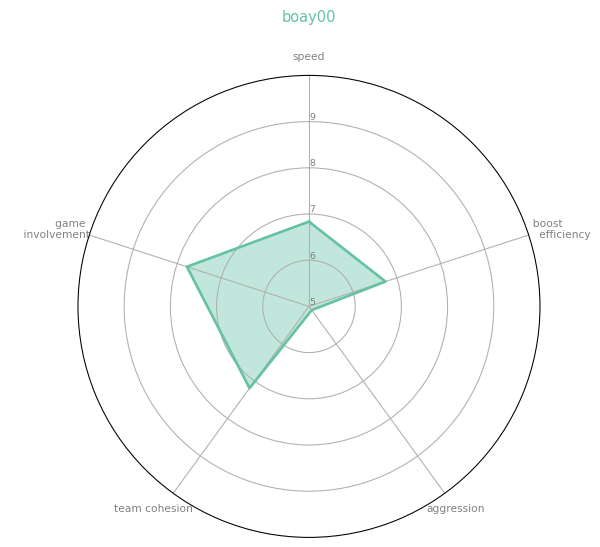

In [35]:
plot, df_2 = make_plots(df.head(1), 'boay00')

In [36]:
df_2

,group,speed,boost \n efficiency,aggression,team cohesion,game \n involvement
0,boay00,6.835501,6.741811,5.099695,7.188493,7.778202


In [37]:
df_2_n = df_2.select_dtypes(include = 'number').values.min()
df_2_n
# df_2_n.values.min()

5.099694599445191

In [38]:
(boost_efficiency_df.boost_efficiency / 9.117117480246007
                                                                                        ) * 9.5

NameError: name 'boost_efficiency_df' is not defined